total number of images for motorbike: 299
[49, 265, 485, 765]


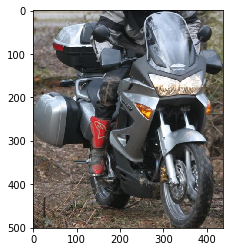

"\nif category=='car':\n    print(Box['anno'][0,50]['height'][0,0][0,0])\n    print(Box['boxes'][0,50].shape)\nelse:\n    print(Box[50,0]['name'][0,0][0])\n    print(Box[50,0]['boxes'][0,0].shape)\n# mat_contents['Box']['anno'][0,50]['height'][0,0][0,0]\n# mat_contents['Box']['anno'][0,50]['height'][0,0][0,0]\n# mat_contents['Box'].shape\n"

In [35]:
import scipy.io as sio
from scipy.spatial.distance import cdist
from FeatureExtractor import *
from config_voting import *
import matplotlib.pyplot as plt
category='motorbike'
set_type='test'
file_nm = 'bbox_props_{0}_{1}_{2}_2.mat'.format(category, dataset_suffix, set_type)
# file_nm='test.mat'
file_bbox_proposals = os.path.join(Data['root_dir'], file_nm)

assert(os.path.isfile(file_bbox_proposals))
mat_contents = sio.loadmat(file_bbox_proposals)
Box = mat_contents['Box']

dir_img = Dataset['img_dir'].format(category)
dir_anno = Dataset['anno_dir'].format(category)
file_list = Dataset['{0}_list'.format(set_type)].format(category)
with open(file_list, 'r') as fh:
    content = fh.readlines()
    
img_list = [x.strip().split() for x in content]
img_num = len(img_list)
print('total number of images for {1}: {0}'.format(img_num, category))
        
ii=1
for nn in range(125,126):
    file_img = os.path.join(dir_img, '{0}.JPEG'.format(img_list[nn][0]))
    assert(os.path.isfile(file_img))
    img = cv2.imread(file_img)
    img = img.transpose(1,0,2)[:,::-1,:]
    height, width, _ = img.shape
    
    file_anno = os.path.join(dir_anno, '{0}.mat'.format(img_list[nn][0]))
    mat_contents = sio.loadmat(file_anno)
    record = mat_contents['record']
    objects = record['objects']
    bbox = objects[0,0]['bbox'][0,int(img_list[nn][1])-1][0]
    bbox = [max(math.ceil(bbox[0]), 1), max(math.ceil(bbox[1]), 1), \
            min(math.floor(bbox[2]), width), min(math.floor(bbox[3]), height)]
    
    print(bbox)
    
    img_b = img[bbox[1]-1: bbox[3], bbox[0]-1: bbox[2], :]
    plt.imshow(img_b[...,::-1])
    plt.show()
    
    if category=='car':
        assert(Box['anno'][0,nn]['height'][0,0][0,0] == height)
        assert(Box['anno'][0,nn]['width'][0,0][0,0] == width)
        boxes = Box['boxes'][0,nn]
    else:
        assert(Box[nn,0]['name'][0,0][0]==img_list[nn][0])
        boxes = Box[nn,0]['boxes'][0,0]
        
    boxes = boxes[0:min(Feat['max_num_props_per_img'], boxes.shape[0]), :]
    num_box = boxes.shape[0]
    for jj in range(num_box):
        bbox = boxes[jj, 0:4]
        bbox = [max(math.ceil(bbox[0]), 1), max(math.ceil(bbox[1]), 1), \
                min(math.floor(bbox[2]), width), min(math.floor(bbox[3]), height)]
        
        # print(nn,jj,bbox, boxes[jj, 0:4], img.shape)
        if bbox[0]>bbox[2] or bbox[1]>bbox[3]:
            print(nn,jj,bbox, boxes[jj, 0:4], img.shape)
            

'''
if category=='car':
    print(Box['anno'][0,50]['height'][0,0][0,0])
    print(Box['boxes'][0,50].shape)
else:
    print(Box[50,0]['name'][0,0][0])
    print(Box[50,0]['boxes'][0,0].shape)
# mat_contents['Box']['anno'][0,50]['height'][0,0][0,0]
# mat_contents['Box']['anno'][0,50]['height'][0,0][0,0]
# mat_contents['Box'].shape
'''


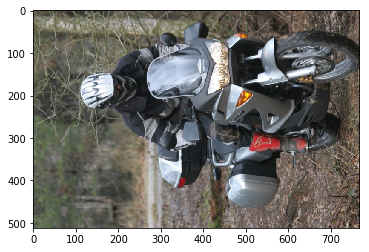

/mnt/4T-HD/qing/PASCAL3D+_release1.1/Images/motorbike_imagenet/n03790512_7145.JPEG


In [27]:

file_img = os.path.join(dir_img, '{0}.JPEG'.format(img_list[125][0]))
img = cv2.imread(file_img)
plt.imshow(img[...,::-1])
plt.show()
print(file_img)

In [14]:
print(boxes[jj,0:4])
print(bbox)

[ 770.08172607  158.91885376  808.84985352  196.95111084]
[771, 159, 808, 196]


In [ ]:
category='car'
set_type='train'
file_cache_feat = os.path.join(Feat['cache_dir'], '{0}_{1}_{2}.pickle'.format(category, dataset_suffix, set_type))
assert(os.path.isfile(file_cache_feat))
with open(file_cache_feat, 'rb') as fh:
    feat_set = pickle.load(fh)
    
assert(os.path.isfile(Dictionary))
with open(Dictionary, 'rb') as fh:
    _,centers = pickle.load(fh)
     
assert(centers.shape[0]==VC['num'])
print('compute and cache VC distance data for {1} {0} set ...\n'.format(set_type, category))

In [3]:
r_set = [None for nn in range(len(feat_set))]
for nn in range(1):
    layer_feature = feat_set[nn]
    print(layer_feature.shape)
    height = layer_feature.shape[0]
    width = layer_feature.shape[1]
    assert(featDim == layer_feature.shape[2])
    
    layer_feature = layer_feature.reshape(-1, featDim)
    feat_norm = np.sqrt(np.sum(layer_feature**2, 1)).reshape(-1,1)
    layer_feature = layer_feature/feat_norm
    
    dist = cdist(layer_feature, centers).reshape(height,width,-1)
    print(dist.shape)
    assert(dist.shape[2]==centers.shape[0]);
    r_set[nn] = dist


(14, 14, 512)
(14, 14, 198)


In [36]:
from scipy.spatial.distance import cdist
import scipy.io as sio
from config_voting import *
category='car'
set_type='train'

dir_img = Dataset['img_dir'].format(category)
dir_anno = Dataset['anno_dir'].format(category)

file_list = Dataset['{0}_list'.format(set_type)].format(category)
assert(os.path.isfile(file_list))

with open(file_list, 'r') as fh:
    content = fh.readlines()
    
img_list = [x.strip().split() for x in content]
img_num = len(img_list)
print('total number of images for {1}: {0}'.format(img_num, category))

total number of images for car: 1000


In [40]:
nn=1
file_anno = os.path.join(dir_anno, 'n03770679_16757.mat')
assert(os.path.isfile(file_anno))
mat_contents = sio.loadmat(file_anno)
record = mat_contents['record']
record['imgsize'][0,0][0,1]


480

In [46]:
objects = record['objects']
objects[0,0]['class'][0,1][0]
# bbox = objects[0,0]['bbox'][0,int(img_list[nn][1])-1][0]
# print(bbox)

'car'

In [5]:
from config_voting import *
file_nm='props_feat_aeroplane_mergelist_rand_test_8.pickle'
file_cache_feat_batch = os.path.join(Feat['cache_dir2'], file_nm)
with open(file_cache_feat_batch,'rb') as fh:
    feat = pickle.load(fh)
    
print(len(feat))

24


In [6]:
feat2 = np.array([ff['feat'] for ff in feat])

In [1]:
import scipy.io as sio
from config_voting import *
category = 'car'
occlusion = 0
oracle = 1

annotation_base = Dataset['anno_dir']
if occlusion==0:
    image_list = '/mnt/4T-HD/qing/intermediate_sp/dataset/test_list/{0}_test.txt'.format(category)
    image_base = Dataset['img_dir'].format(category)
else:
    sys.exit('Have not implemented for occlusion other than 0')

sp_base = '/mnt/4T-HD/qing/intermediate_sp/SP_final/{0}_imagenet/transfered'.format(category)
assert(os.path.isfile(image_list))
with open(image_list, 'r') as fh:
    content = fh.readlines()

fList = [x.strip().split() for x in content]
img_num = len(fList)
print('total number of images for {1}: {0}'.format(img_num, category))




total number of images for car: 2000


In [2]:
ii=0
imgPath = os.path.join(image_base, '{0}.JPEG'.format(fList[ii][0]))
annoPath = os.path.join(annotation_base, '{0}.mat'.format(fList[ii][0]))
spPath = os.path.join(sp_base, '{0}.mat'.format(fList[ii][0]))
assert(os.path.isfile(spPath))

In [9]:
mat_contents = sio.loadmat(spPath)
spanno = mat_contents['anno'][int(fList[ii][1])-1, 1]

In [29]:
spanno[1,0]

(2, 9)

In [17]:
iheight=2
iwidth=3
np.unravel_index(list(range(iheight*iwidth)), (iheight, iwidth))

(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))

In [18]:
tt = np.array(range(6)).reshape(2,3)

In [31]:
9999<np.inf

True

In [25]:
np.concatenate([[],tt], axis=0)

ValueError: all the input arrays must have same number of dimensions